In [1]:
import time
import numpy as np
from numpy.random import uniform

In [2]:
s = 10.
b = 8./3. # descrive proprietà geometriche

h = 0.025
ti = 0.
tf = 50.
sig_len = 2000
t_jump = (tf-ti)/(sig_len*h)
if t_jump%1.0 != 0 : print("temporal step problem")
n_traj = 20
tv = np.arange(ti,tf,h)
nr = 2
db = np.ndarray((nr*n_traj,sig_len,3))

x = np.ndarray(3)
print(f't_jump: {t_jump}')

t_jump: 1.0


In [3]:
#def f(x,y,z,s): # x'(t) = f(x,y,z)
#    return s*( -x + y )
#def g(x,y,z,r): # y'(t) = g(x,y,z)
#    return r*x - y -x*z
#def u(x,y,z,b): # z'(t) = h(x,y,z)
#    return -b*z + x*y
#
#def rk4_3x3(x,y,z,s,r,b): # formula rk4 per sistemi 2x2 nella variante più usata
#    aaa = np.ndarray(shape=3)
#    k1 = h * f(x,y,z,s)
#    l1 = h * g(x,y,z,r)
#    w1 = h * u(x,y,z,b)
#    k2 = h * f(x+k1/2,y+l1/2,z+w1/2,s)
#    l2 = h * g(x+k1/2,y+l1/2,z+w1/2,r)
#    w2 = h * u(x+k1/2,y+l1/2,z+w1/2,b)
#    k3 = h * f(x+k2/2,y+l2/2,z+w2/2,s)
#    l3 = h * g(x+k2/2,y+l2/2,z+w2/2,r)
#    w3 = h * u(x+k2/2,y+l2/2,z+w2/2,b)
#    k4 = h * f(x+k3,y+l3,z+w3,s)
#    l4 = h * g(x+k3,y+l3,z+w3,r)
#    w4 = h * u(x+k3,y+l3,z+w3,b)
#    xnext = (x + k1/6 + k2/3 + k3/3 + k4/6)
#    ynext = (y + l1/6 + l2/3 + l3/3 + l4/6)
#    znext = (z + w1/6 + w2/3 + w3/3 + w4/6)
#    aaa[:] = xnext,ynext,znext
#    return aaa

In [4]:
# dbprova = np.ndarray((nr*n_traj,sig_len,3))
# rv = [10., 50.]
# labels = []
# for r in rv:
#     labels += [r]*n_traj
# labels = np.array(labels)
# i=0
# h = 0.025/10
# tv = np.arange(ti,tf,h)
# t_jump = (tf-ti)/(sig_len*h)
# for r in rv:
#     for k in range(n_traj):
#         if k == n_traj - 1 : print(r,k,n_traj,'\nDONE!')
#         else : print(r,k,n_traj, end='\r')
#         x[0] = uniform(-14.0,14.0)
#         x[1] = uniform(-22.0,22.0)
#         x[2] = uniform(7.0,43.0)
#         dbprova[k,0,:] = x
#         t_int = 1
#         j = 1
#         for t in tv:
#             x = rk4_3x3(x[0],x[1],x[2],s,r,b)
#             if t_int%t_jump==0 :
#                 dbprova[i,j,:] = x
#                 j += 1
#             if j == sig_len: break
#             t_int += 1
#         i += 1

In [5]:
#rvv = [[20.0, 27.5],[10.0, 50.0],[22.5, 26.0]]
#for rv in rvv:
#    path = f'/scratch/scarpolini/databases/db_lorenz_{rv[0]}_{rv[1]}'
#    labels_path = f'/scratch/scarpolini/databases/lorenz_labels_{rv[0]}_{rv[1]}'
#    labels = []
#    for r in rv:
#        labels += [r]*n_traj
#    labels = np.array(labels)
#    i=0
#    db = np.ndarray((nr*n_traj,sig_len,3))
#    x = np.ndarray(3)
#    for r in rv:
#        for k in range(n_traj):
#            if k == n_traj - 1 : print(r,k,n_traj,'\nDONE!')
#            elif k%(n_traj/10) == 0 : print(r,k,n_traj,f'\t time:{time.process_time()/60.:.1f} minutes')
#            else : print(r,k,n_traj, end='\r')
#            x[0] = uniform(-14.0,14.0)
#            x[1] = uniform(-22.0,22.0)
#            x[2] = uniform(7.0,43.0)
#            db[k,0,:] = x
#            t_int = 1
#            j = 1
#            for t in tv:
#                x = rk4_3x3(x[0],x[1],x[2],s,r,b)
#                if t_int%t_jump==0 :
#                    db[i,j,:] = x
#                    j += 1
#                if j == sig_len: break
#                t_int += 1
#            i += 1
#    np.save(labels_path,labels)
#    np.save(path, db)

In [6]:
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# import numpy as np
# %matplotlib inline
# 
# n = round(np.random.uniform(40))
# print(n)
# # traj = dbprova[n,:,:]
# # print(labels[n])
# # plt.plot(traj[:,0], color="r")
# # #plt.plot(traj[:,1], color="r")
# # #plt.plot(traj[:,2], color="r")
# traj = db[n,:,:]
# print(labels[n])
# plt.plot(traj[:,0], color="b")
# #plt.plot(traj[:,1], color="b")
# #plt.plot(traj[:,2], color="b")
# plt.show()
# 
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot3D(traj[:,0],traj[:,1],traj[:,2])

VERSIONE CON SCIPY.SOLVE_IVP

In [32]:
from scipy.integrate import solve_ivp
import numpy as np

h = 0.025
ti = 0.
tf = 50.
sig_len = 2000
t_jump = (tf-ti)/(sig_len*h)
if t_jump%1.0 != 0 : print("temporal step problem")
n_traj = 50000
tv = np.arange(ti,tf,h)
db = np.ndarray((nr*n_traj,sig_len,3))

def solve_lorenz(N, rho, sigma=10.0, beta=8./3.):

    def lorenz_deriv(t0, x_y_z, sigma=sigma, beta=beta, rho=rho):
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]        
    
    xx = np.ndarray(shape=(N,3))
    for i in range(N):
        xx[i,:] = np.array([uniform(-14.0,14.0),uniform(-22.0,22.0),uniform(7.0,43.0)])
    
    a = [solve_ivp(lorenz_deriv, t_span=(0.,50), y0=xxx, method='RK45', t_eval=tv) for xxx in xx]#, dense_output=False, events=None, vectorized=False, args=None, )
    
    return a

In [1]:
import numpy as np
nr = 5
rh = 2.0
ri = 22.0
rf = 32.0
rv = np.arange(ri,rf,rh)
if len(rv) != nr : print("problem")
print(f"rv: {rv}")

rv: [22. 24. 26. 28. 30.]


In [ ]:
import time

db = np.ndarray(shape=(n_traj,3,sig_len))
for r in rv:
    k = 0
    j = 0
    for n_batch in range(round(n_traj/500)):
        a = solve_lorenz(500, r)
        print(f'solved {500*(n_batch+1):6} trajs of {n_traj} for r={r}',end='\r')
        if 500*(n_batch+1) == n_traj: print(f'solved {500*(n_batch+1):6} trajs of {n_traj} for r={r}\t time:{time.process_time()/60.:.1f} minutes')
        for i in range(500):
            if a[i].success == True :
                db[j,:,:] = a[i].y
                j += 1
            else : k += 1
    np.save(f"/scratch/scarpolini/databases/db_lorenz_{r:.1f}",db)
    print("done!, %d errors"%k)

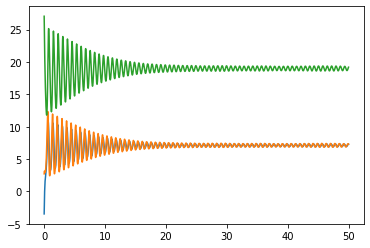

In [31]:
#import matplotlib.pyplot as plt
#db = np.load('/scratch/scarpolini/databases/db_lorenz_20.0.npy')
#n = round(uniform(1000))
#aa = db[n,:,:]
#plt.plot(tv,aa[0])
#plt.plot(tv,aa[1])
#plt.plot(tv,aa[2])